In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [38]:
mu = []
std = []


### Read and Visualize data 

In [39]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('house price')
    plt.plot(x, y, 'go')


In [40]:
def normalize(data):
    for i in range(data.shape[1]-1):
        data[:,i]=(data[:,i]- np.mean(data[:,i]))/np.std(data[:,i])
        mu.append(np.mean(data[:, i]))
        std.append(np.std(data[:, i]))


In [41]:
def read_data(file):
    df = pd.read_csv(file, header=None)
    df.columns=['size',' #rooms','price']
    data = np.array(df, dtype= float )
    plot_data(data[:, 0], data[:, 2]) ## price depending on house size 
    normalize(data) 
    return data[:,:2], data[:,2]  # house and nb rooms / price


dim X :  (47, 3)
dim Y :  (47, 1)


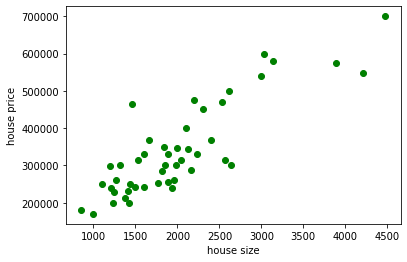

In [42]:
x ,y= read_data("house_price_data.txt")
X= np.hstack((x,np.ones((x.shape[0],1))))
y= y.reshape(y.shape[0],1)
print("dim X : ",X.shape)
print("dim Y : ", y.shape)

In [43]:
theta = np.random.randn(3,1)
theta.shape

(3, 1)

In [44]:
def h(X,theta):
	return X.dot(theta)




In [45]:
# X

# 0.131415422*-1.66669631 + (-0.226093368*0.0380944) + 1*1.57551011


In [46]:
def cost_function(X,y,theta):
    m = X.shape[0]
    return 1/(2*m) * np.sum((h(X, theta)-y)**2)

cost_function(X,y,theta)


65592268946.4394

In [47]:
print("X : " , X.T.shape)
print("model : " ,h(X,theta).shape)



X :  (3, 47)
model :  (47, 1)


In [48]:
def grad(X,y,theta):
    m=X.shape[0]
    return (1/m)*X.T.dot(h(X,theta)-y)


In [49]:
def gradient_descent(X,y,theta,alpha,iterations): #alpha = learning rate
    cost_history = np.zeros(iterations)
    for i in range (0,iterations):
        theta= theta - alpha*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history
    


## Training part

In [50]:
theta_final,costhistory=gradient_descent(X,y,theta, alpha=0.001,iterations=10000)
# theta_final


In [51]:
preditions = h(X,theta_final)

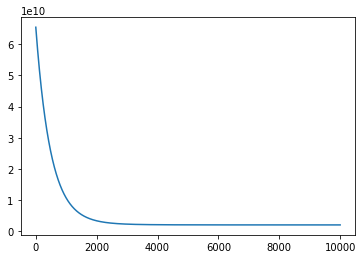

In [52]:
plt.plot(range(10000),costhistory)



In [53]:
def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)


test(theta_final, [1600, 3])


Price of house:  [-8257333.47072162]


In [55]:
print("final cost : ", costhistory[9999])
print("initial cost : ", costhistory[0])



final cost :  2043502817.9248872
initial cost :  65462275697.79493
